# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [2]:
from commonfunctions import *
import skimage.io as io
from skimage.color import rgb2gray,rgba2rgb
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

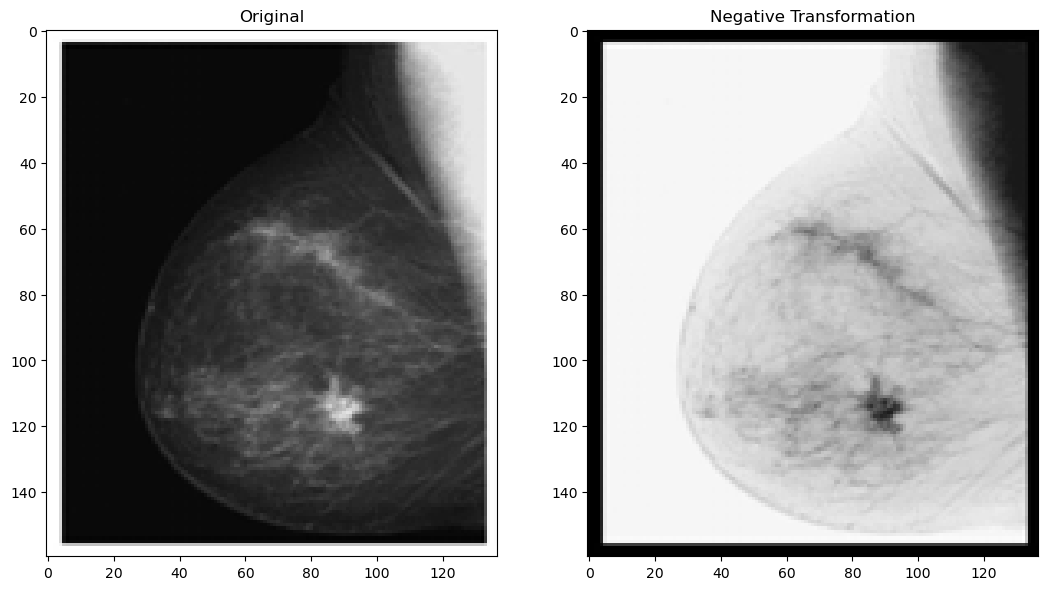

In [4]:
'''
1
Negative Transformation
'''
def negative_transformation(img):
    return 255 - img

image = io.imread('imgs/Picture1.png')
gray = rgb2gray(rgba2rgb(image))
negative_transformation_img = negative_transformation(gray)
show_images([gray, negative_transformation_img], ['Original', 'Negative Transformation'])




75.9922


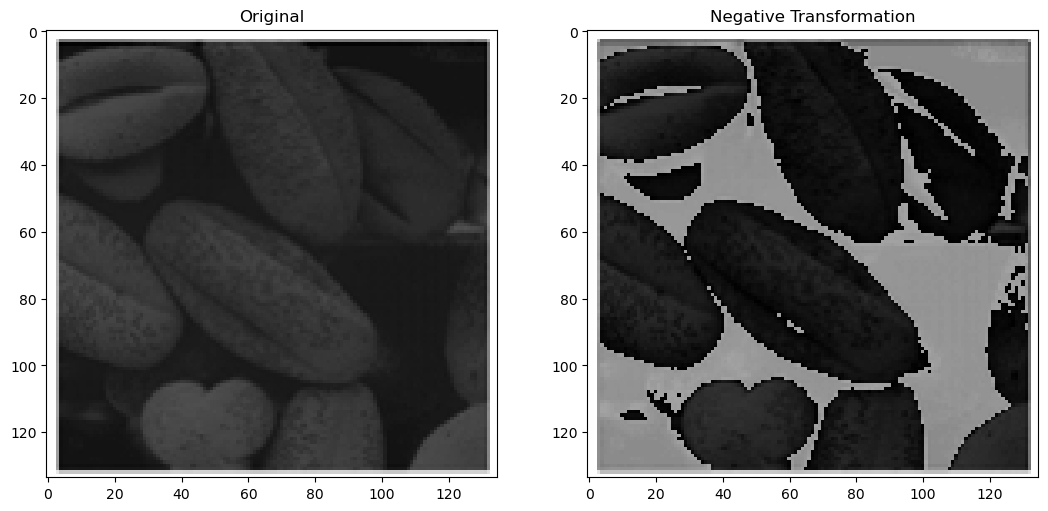

100.13839999999999


In [5]:
'''
2
Contrast Enhancement
'''
def contrast_enhancement(img):
    new_img = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j] < 100/255:
                new_img[i][j] = 1.5 * img[i][j] + 50/255
            else:
                 new_img[i][j] = img[i][j]
    return new_img
image = io.imread('imgs/Picture2.png')
gray = rgb2gray(rgba2rgb(image))
print(np.min(gray)*255)
negative_transformation_img = contrast_enhancement(gray)
show_images([gray, negative_transformation_img], ['Original', 'Negative Transformation'])
print(np.min(negative_transformation_img)*255)




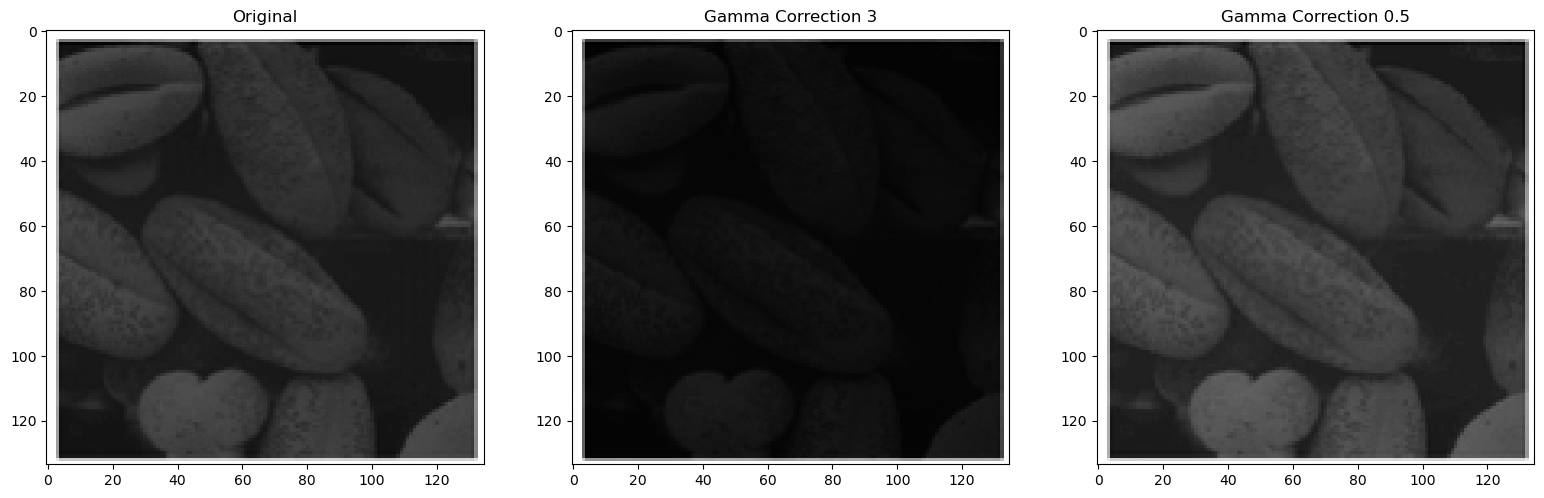

In [6]:
'''
3
Gamma Correction
'''
def gamma_correction(img,constant ,gamma):
    return constant * img ** gamma

gray = rgb2gray(rgba2rgb(image))
transformation_1_3 = gamma_correction(gray,1,3)
transformation_1_05 = gamma_correction(gray,1,0.5)
show_images([gray, transformation_1_3, transformation_1_05], ['Original', 'Gamma Correction 3', 'Gamma Correction 0.5'])





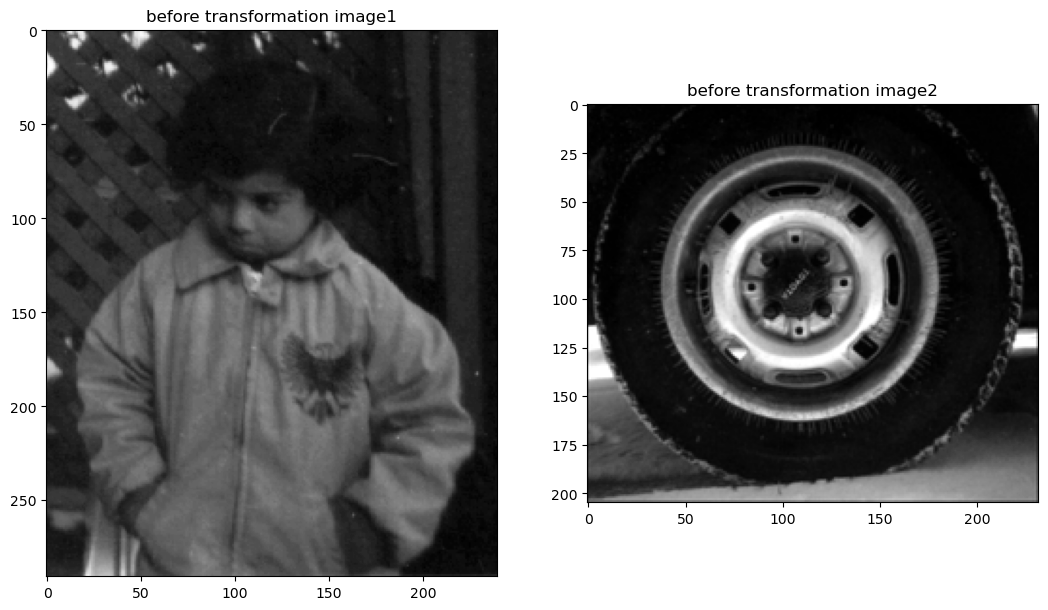

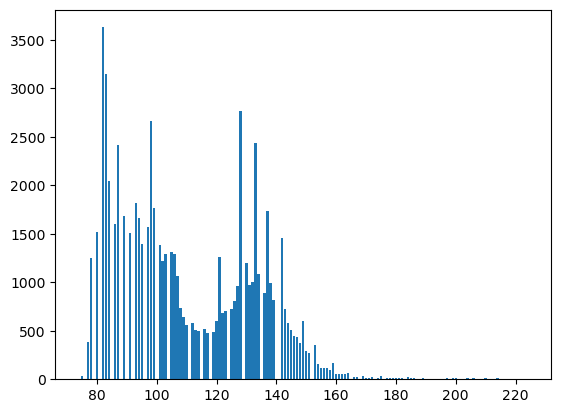

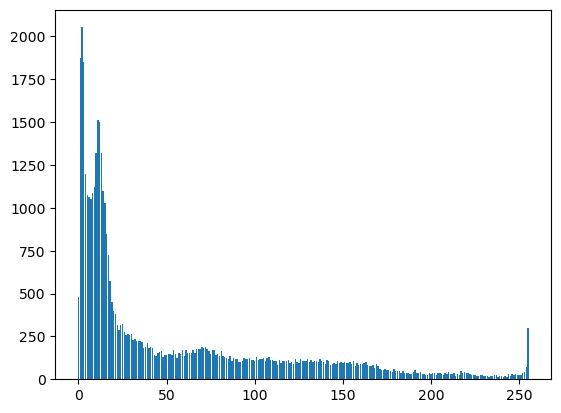

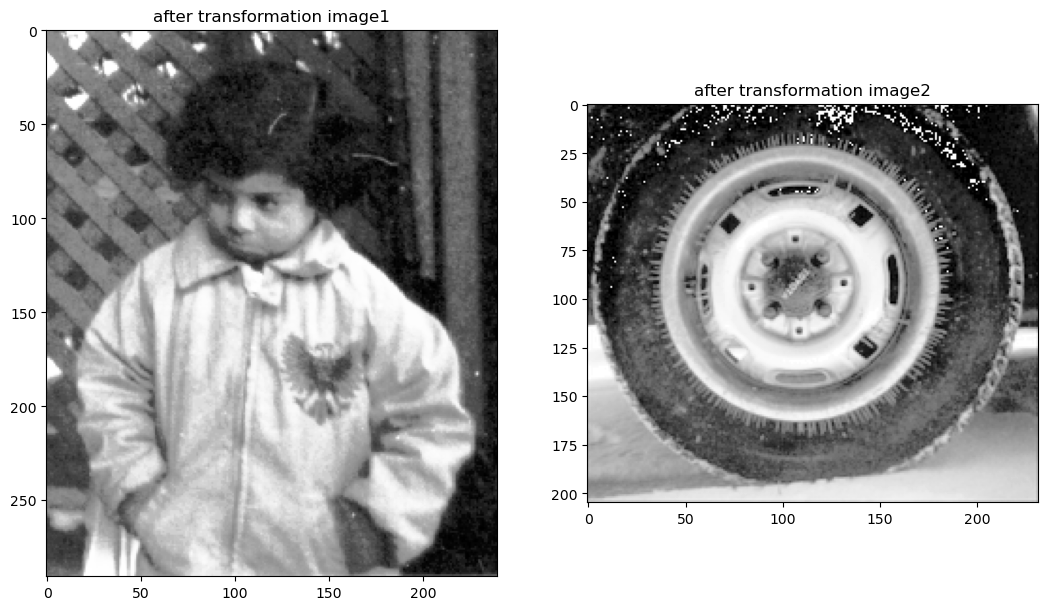

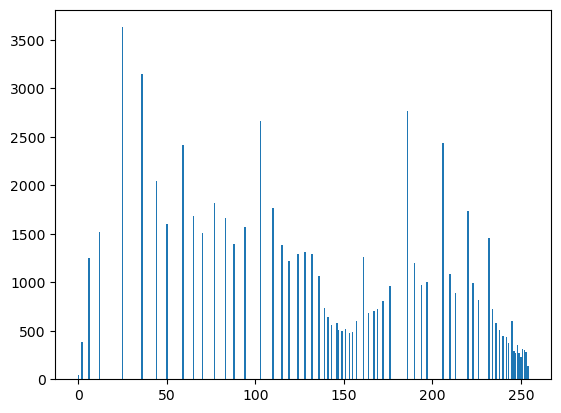

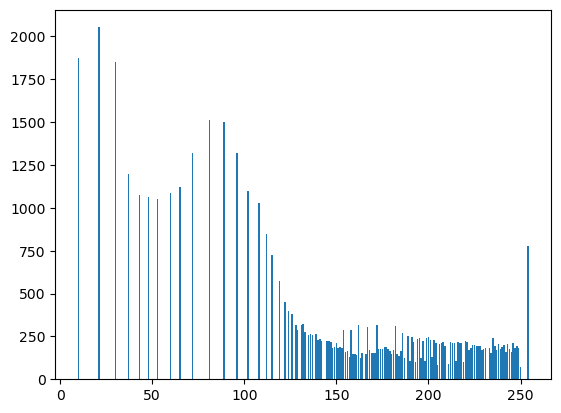

In [7]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''
image1 = io.imread('imgs/pout.tif')
image2 = io.imread('imgs/tire.tif')

# before histogram equalization
show_images([image1, image2], ['before transformation image1', 'before transformation image2'])
showHist(image1)
showHist(image2)


def getImageWithHist(image):
    Number_of_Pixels = image.shape[0]*image.shape[1]
    H = np.zeros(255)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            H[image[i][j]-1] += 1 
    P = H  / Number_of_Pixels       
    
    CDF = np.zeros(255)
    CDF[0] = P[0]
    for i in range(1,255):
        CDF[i] = CDF[i-1] + P[i]
    T = np.round(CDF * 255) 

    # convert to new levels
    new_image = np.zeros(image.shape)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            new_image[i][j] = T[image[i][j]-1]

    return new_image

# after histogram equalization
imageAfter1 = getImageWithHist(image1)
imageAfter2 = getImageWithHist(image2)
show_images([imageAfter1, imageAfter2], ['after transformation image1', 'after transformation image2'])
showHist(imageAfter1)
showHist(imageAfter2)

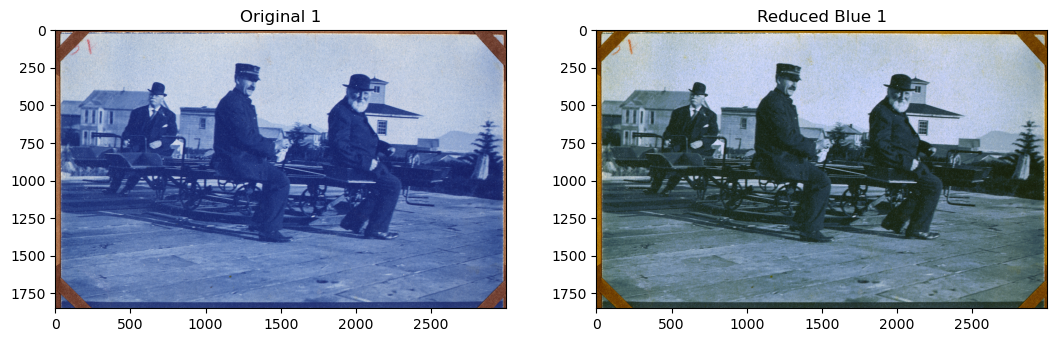

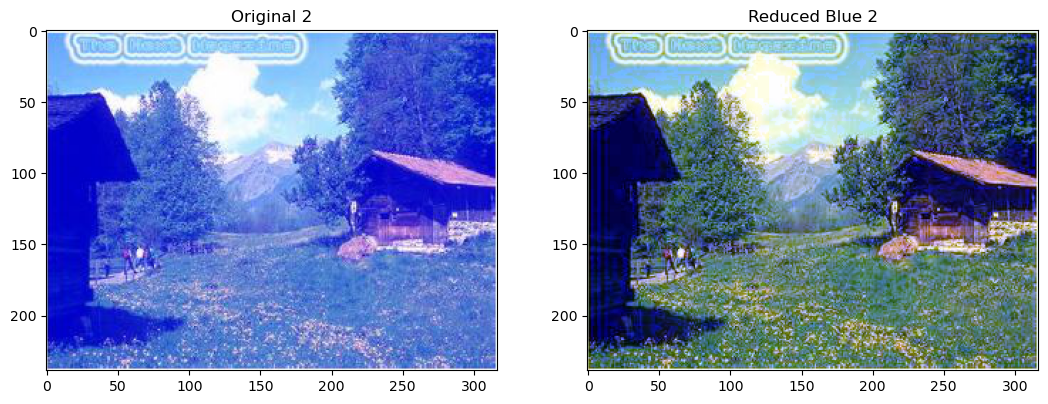

In [9]:
import numpy as np
from skimage import io, img_as_float, img_as_ubyte
import matplotlib.pyplot as plt

image11 = io.imread('1.jpg')
image22 = io.imread('2.jpg')

def reduce_blue(image, factor=0.8):
    
    return  getImageWithHist(image[:, :, 2])

image1 = np.copy(image11)
image2 = np.copy(image22)
image1[:, :, 2] = reduce_blue(image1)
image2[:, :, 2] = reduce_blue(image2)

show_images([image11, image1], ['Original 1', 'Reduced Blue 1'])
show_images([image22, image2], ['Original 2', 'Reduced Blue 2'])
